In [79]:
# Core
import numpy as np
from sklearn import tree 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Constants
random_state=300

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# For point 3
from sklearn.metrics import confusion_matrix
import pandas as pd

# For point 4
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

# Graphs
import graphviz 
import matplotlib.pyplot as plt  

# Your work: what you have to do
## Modify the given Jupyter notebook on decision trees on Iris data and perform the following tasks:

### 1.a) get an artificial inflation of some class in the training set by a given factor: 10 (weigh more the classes virginica e versicolor which are more difficult to discriminate). Learn the tree in these conditions.

In [80]:
iris = load_iris()

# Solution dev w/ Numpy Master: Marco

inflation_factor = 10
inflated_iris = dict()

# Since the only class which we don't want to inflate is setosa
# (value 0), we can write this single line to obtain an array
# specifying how many times each element has to be repeated 
keep = np.clip(iris.target * inflation_factor, a_min=1, a_max=inflation_factor)

inflated_iris['data'] = np.repeat(iris.data, keep, axis=0)
inflated_iris['target'] = np.repeat(iris.target, keep, axis=0)

# Shuffle the data
np.random.seed(0)
indices = np.random.permutation(len(inflated_iris['data'])) #lenght of the matrix

# We now decide to keep the last 210 indices (20%) for test set, the remaining for the training set
indices_training=indices[:-210]
indices_test=indices[-210:]

X_train_inf = inflated_iris['data'][indices_training] # keep for training all the matrix elements with the exception of the last 10 
y_train_inf = inflated_iris['target'][indices_training]
X_test_inf  = inflated_iris['data'][indices_test] # keep the last 210 elements for test set
y_test_inf  = inflated_iris['target'][indices_test]

# Random state is for reproducing the same test
# X_train_inf, X_test_inf, y_train_inf, y_test_inf = train_test_split(inflated_iris['data'], inflated_iris['target'], test_size=0.20, random_state=6)

In [81]:
# fit the model to the training data
clf_inflated = tree.DecisionTreeClassifier(criterion="entropy",random_state=random_state,min_samples_leaf=5)

clf_inflated = clf_inflated.fit(X_train_inf, y_train_inf)

# apply fitted model "clf" to the test set 
predicted_y_test_inf = clf_inflated.predict(X_test_inf)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test_inf)
print("True classes:")
print(y_test_inf) 
print(iris.target_names)

Predictions:
[1 2 1 1 2 2 1 1 1 0 1 1 1 1 2 2 2 1 2 1 2 1 2 2 1 2 1 1 1 2 2 0 1 1 1 1 1
 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 0 1 1 2 0 2 0 1 2 0 2 1 0 2 1 2 1 1 2 2 1
 2 2 1 1 1 2 0 2 2 1 2 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2 1 2 1 2 2 1
 2 2 2 2 1 2 1 2 1 2 1 2 0 2 2 1 1 1 2 2 2 2 2 1 2 1 1 1 2 1 2 1 1 2 1 1 2
 2 1 0 2 1 1 1 2 1 2 2 1 2 2 1 2 0 1 2 1 1 2 1 1 2 1 1 2 2 1 2 1 1 2 1 2 2
 2 1 2 1 2 2 1 2 1 2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 2]
True classes:
[1 2 1 1 2 2 1 1 1 0 1 1 1 1 2 2 2 1 2 1 2 1 2 2 1 2 1 1 1 2 2 0 1 1 1 1 1
 1 2 2 1 1 2 2 1 1 1 2 2 1 2 2 1 0 1 1 2 0 2 0 1 2 0 2 1 0 2 1 2 1 1 2 2 1
 2 2 1 1 1 2 0 2 2 1 2 1 1 1 2 1 2 2 1 2 2 2 1 2 2 1 2 1 1 2 2 1 2 1 2 2 1
 2 2 2 2 1 2 1 2 1 2 1 2 0 2 2 1 1 1 2 2 2 2 2 1 2 1 1 1 2 1 2 1 1 2 1 1 2
 2 1 0 2 1 1 1 2 1 2 2 1 2 2 1 2 0 1 2 1 1 2 1 1 2 1 1 2 2 1 2 1 1 2 1 2 2
 2 1 2 1 2 2 1 2 1 2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 2]
['setosa' 'versicolor' 'virginica']


### Scoring and graph

In [82]:
acc_score_inflated = accuracy_score(y_test_inf, predicted_y_test_inf)
print("Accuracy score: " + str(acc_score_inflated))
f1_inflated = f1_score(y_test_inf, predicted_y_test_inf, average='macro') # what is this score = macro avg between recall and precison
print("F1 score: " + str(f1_inflated))

Accuracy score: 1.0
F1 score: 1.0


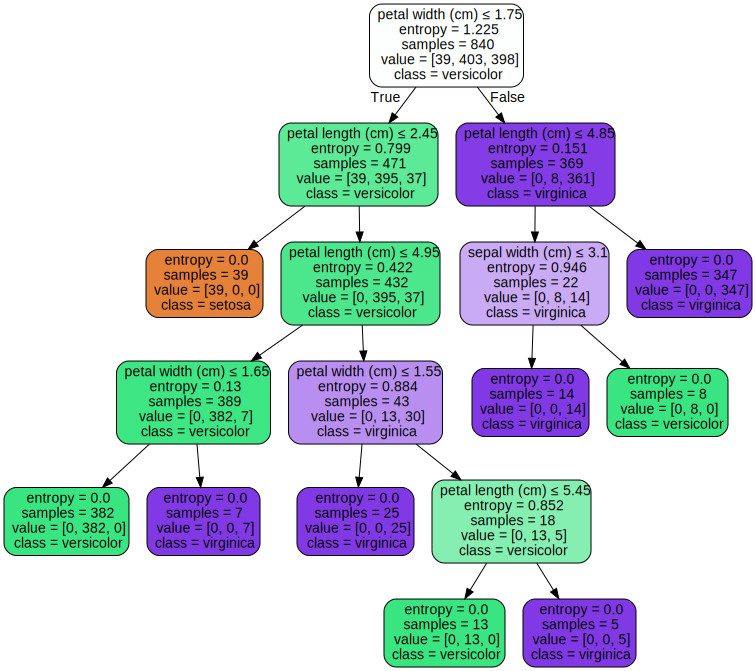

In [83]:
dot_data_w = tree.export_graphviz(clf_inflated, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data_w)  
graph

## 1.b) Modify the weight of some classes (set to 10 the weights for misclassification between virginica into versicolor and vice versa) and learn the tree in these conditions. 
You should obtain similar results as for step 1.

In [84]:
clf_weighted = tree.DecisionTreeClassifier(criterion="entropy",random_state=random_state,min_samples_leaf=5,class_weight={0:1,1:10,2:10})

# Load iris data
X,y = load_iris(return_X_y=True)

# Random state is for reproducing the same test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# fit the model to the original training data
clf_weighted = clf_weighted.fit(X_train, y_train)

# apply fitted model "clf_weighted" to the test set 
predicted_y_test_w = clf_weighted.predict(X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test_w)
print("True classes:")
print(y_test) 
print(iris.target_names)

Predictions:
[2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 1 2 1 1 2 2]
True classes:
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]
['setosa' 'versicolor' 'virginica']


### Scoring and graph

In [85]:
# print some metrics results
acc_score = accuracy_score(y_test, predicted_y_test_w)
print("Accuracy score: "+ str(acc_score))
f1=f1_score(y_test, predicted_y_test_w, average='macro') # what is this score = macro avg between recall and precison
print("F1 score: "+str(f1))

Accuracy score: 0.8666666666666667
F1 score: 0.883838383838384


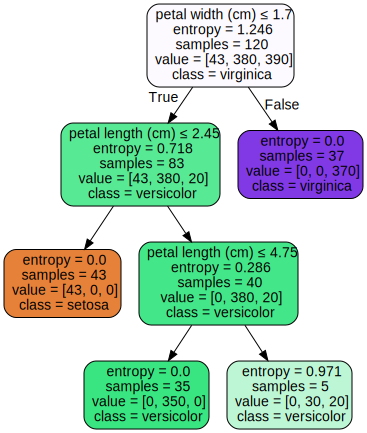

In [86]:
dot_data_w = tree.export_graphviz(clf_weighted, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data_w)  
graph

## 2. Learn trees but try to avoid overfitting (by improving the error on the test set) tuning the hyper-parameters on: 
### the minimum number of samples per leaf, max depth of the tree, min_impurity_decrease parameters, max leaf nodes, etc.

In [87]:
# We create a different DecionTree with tuned params class_weight={0:1,1:1,2:1}
clf_refined = tree.DecisionTreeClassifier(criterion="entropy",random_state=random_state,
                                        min_samples_leaf=10, min_impurity_split=0.1, max_leaf_nodes= 10, min_samples_split=20, min_impurity_decrease=0.05)

# fit the new model to the original training data
clf_refined = clf_refined.fit(X_train, y_train)

# apply fitted model "clf" to the test set 
predicted_y_test_ref = clf_refined.predict(X_test)

# print the predictions (class numbers associated to classes names in target names)
print("Predictions:")
print(predicted_y_test_ref)
print("True classes:")
print(y_test) 
print(iris.target_names)


Predictions:
[2 1 0 1 2 0 1 1 0 1 2 1 0 2 0 2 2 2 0 0 1 2 1 1 1 2 1 1 2 2]
True classes:
[2 1 0 1 2 0 1 1 0 1 1 1 0 2 0 1 2 2 0 0 1 2 1 2 2 2 1 1 2 2]
['setosa' 'versicolor' 'virginica']


### Scoring and graph tree

In [88]:
# scroing
acc_score_ref = accuracy_score(y_test, predicted_y_test_ref)
print("Accuracy score: " + str(acc_score_ref))
f1_ref = f1_score(y_test, predicted_y_test_ref, average='macro') # what is this score = macro avg between recall and precison
print("F1 score: " + str(f1_ref))

Accuracy score: 0.8666666666666667
F1 score: 0.883838383838384


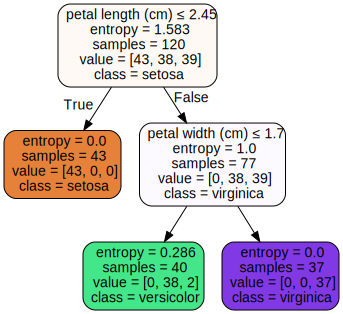

In [89]:
dot_data = tree.export_graphviz(clf_refined, out_file=None, 
                         feature_names=iris.feature_names, 
                         class_names=iris.target_names, 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## 3. Build the confusion matrix of the created tree models on the test set and show them.

In [90]:
# Predict prob
scores = clf_weighted.predict_proba(X_test)[:,1]

# Compute confusion matrix to evaluate the accuracy of a classification.
inflated_cf_matrix = confusion_matrix(y_true=y_test_inf, y_pred=predicted_y_test_inf)
weighted_cf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted_y_test_w)
refined_cf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted_y_test_ref)

#0 'setosa'; 1 'versicolor'; 2 'virginica'
index = ["setosa (act)", "versicolor (act)", "virginica (act)"]
columns = ["setosa (pred)", "versicolor (pred)", "virginica (pred)"]
print("\nConfusion Matrix Inflated Tree")
print(pd.DataFrame(inflated_cf_matrix, index, columns))
print("Confusion Matrix Weighted Tree")
print(pd.DataFrame(weighted_cf_matrix, index, columns))
print("\nConfusion Matrix Refined Tree")
print(pd.DataFrame(refined_cf_matrix, index, columns))



Confusion Matrix Inflated Tree
                  setosa (pred)  versicolor (pred)  virginica (pred)
setosa (act)                 11                  0                 0
versicolor (act)              0                 97                 0
virginica (act)               0                  0               102
Confusion Matrix Weighted Tree
                  setosa (pred)  versicolor (pred)  virginica (pred)
setosa (act)                  7                  0                 0
versicolor (act)              0                 10                 2
virginica (act)               0                  2                 9

Confusion Matrix Refined Tree
                  setosa (pred)  versicolor (pred)  virginica (pred)
setosa (act)                  7                  0                 0
versicolor (act)              0                 10                 2
virginica (act)               0                  2                 9


## 4. Build the ROC curves (or coverage curves in coverage space) and plot them for each tree model you have created:
### for each model you have to build three curves, one for each class, considered in turn as the positive class.

If you got a multilabel problem, what you can do is tackle different classes one at a time. that way it will become many binary binary problems/models. (try building a model to predict if its class A or not, and do the roc curve of it, afterwards, move on to the next class and build another model, and so on)

In [92]:
# Save iris data
X_plot = iris.data
y_plot = iris.target

# Binarize the output
y_plot = label_binarize(y_plot, classes=[0, 1, 2])
n_classes = y_plot.shape[1]

# shuffle and split training and test sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_plot, y_plot, test_size=0.20, random_state=7)

In [93]:
# Subpolt configuration
subplot_kw = dict(
    xlabel=('False Positive Rate'),
    ylabel=('True Positive Rate'),
    xlim=([0.0, 1.0]),
    ylim=([0.0, 1.05]))

In [94]:
# Calculates a binary array in a one vs many fashion (1 if the actual class corresponds to the index, 0 otherwise)
# Credits to Marco
def calculate_actuals_binary(class_index, y_test):
    # Actual is a vector containing 1 only if the correct class corresponds to the current class (determined by index i)
    actual = np.zeros(y_test.shape[0])
    for j in range(y_test.shape[0]):
        if y_test[j] == class_index:
            actual[j] = 1

    return actual

In [95]:
# Appends the binary array for each 
def calculate_scores():
    result = arr = np.zeros([n_classes, y_test.shape[0]])
    for i in range(n_classes):
        array = calculate_actuals_binary(i, y_test)
        result[i] = array

    return result

In [103]:
# As as seen in the documentation 
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py
def compute_roc(classifier, weighted: bool):
    # Learn to predict each class against the other
    # Differente procedure in case the clf has weight
    if weighted:
        y_train_binary = calculate_scores()
        y_score_bin = classifier.predict_proba(X_test)
    else:
        classifier = OneVsRestClassifier(classifier)
        y_score_bin = classifier.fit(X_train_bin, y_train_bin).predict_proba(X_test_bin)
    # Predict each probability

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], thresholds = roc_curve(y_test_bin[:, i], y_score_bin[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    return (fpr, tpr, roc_auc)

In [97]:
# Plot roc curves, one for each class of the datases
def plot_roc_curves(title: str, fpr, tpr, roc_auc):
    fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(24, 6), subplot_kw=subplot_kw)

    ax0.set_title('setosa (act)')
    lw = 0
    ax0.plot(fpr[lw], tpr[lw], color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[lw])
    ax0.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax0.legend(loc="lower right")

    ax1.set_title('versicolor (act)')
    lw = 1
    ax1.plot(fpr[lw], tpr[lw], color='green',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[lw])
    ax1.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax1.legend(loc="lower right")

    ax2.set_title('virginica (act)')
    lw = 2
    ax2.plot(fpr[lw], tpr[lw], color='purple',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[lw])
    ax2.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    ax2.legend(loc="lower right")

    fig.suptitle('ROC curves for ' + title)

    return fig


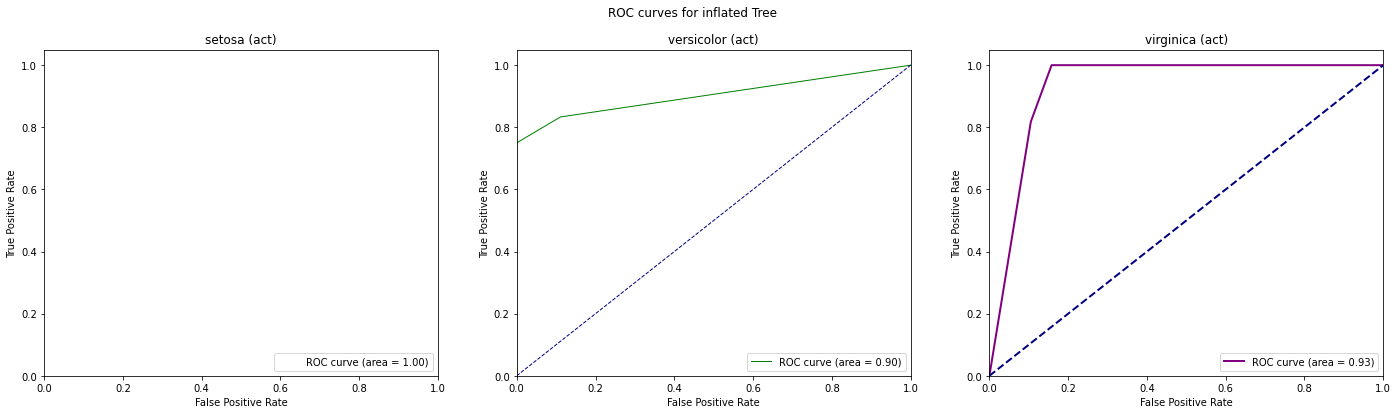

In [104]:
# Inflated case
classifier: tree.DecisionTreeClassifier = clf_inflated
title: str = "Inflated Tree"

frp, tpr, roc_auc = compute_roc(classifier, False)
plot_roc_curves(title, frp, tpr, roc_auc).show()

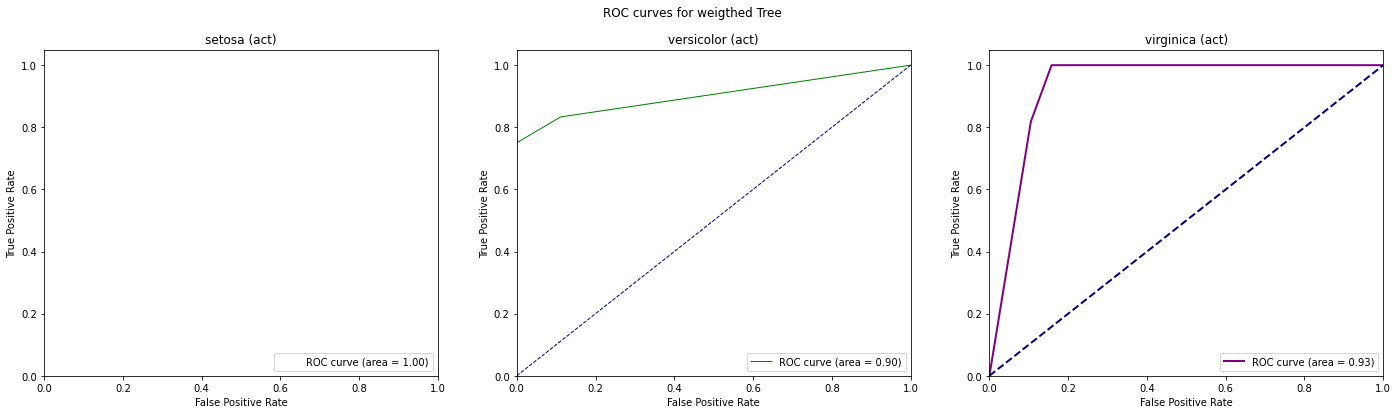

In [105]:
# Weigthed case
classifier: tree.DecisionTreeClassifier = clf_weighted
title: str = "Weigthed Tree"

frp, tpr, roc_auc = compute_roc(classifier, True)
plot_roc_curves(title, frp, tpr, roc_auc).show()

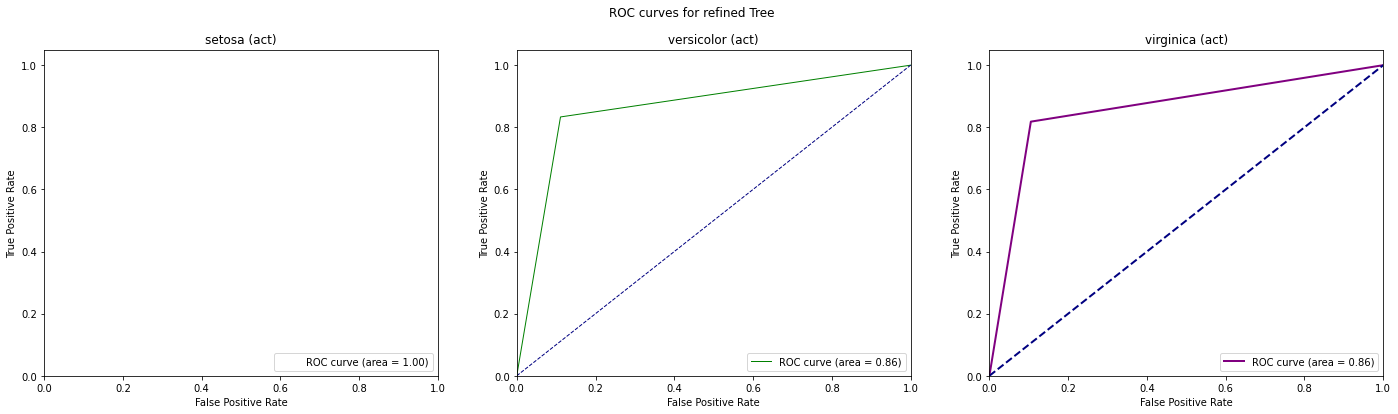

In [75]:
# Refined case
classifier: tree.DecisionTreeClassifier = clf_refined
title: str = "Refined Tree"

frp, tpr, roc_auc = compute_roc(classifier, False)
plot_roc_curves(title, frp, tpr, roc_auc).show()